# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Low Pass Filters
***

Referring to Section 5.6, filtering may be performed at various locations along the receiver chain.  The filter responses are quite different.  The type of filter chosen depends greatly on the application.  For example, Butterworth filters have quite flat responses in the passband.  This type of filter should be used for cases where minimal distortion of the signal is required, such as filtering a signal prior to analog-to-digital conversion. Chebyshev filters, on the other hand, should be chosen when the frequency content of the signal is more important than passband flatness.  An example of this would be trying to separate signals closely spaced in frequency. Elliptic filters are more difficult to design but do have the advantage of providing the fastest roll-off for a given number of poles.
***

Set the filter order, critical frequency (Hz), maximum ripple (dB) and minimum attenuation (dB)

In [9]:
filter_order = 4

critical_frequency = 100

maximum_ripple = 1

minimum_attenuation = 40

Perform low pass filtering for Butterworth, Chebyshev, Bessel and Elliptic type filters

In [10]:
from scipy.signal import butter, cheby1, bessel, ellip, freqs

b, a = butter(filter_order, critical_frequency, 'low', analog=True)

w_butter, h_butter = freqs(b, a)


b, a = cheby1(filter_order, maximum_ripple, critical_frequency, 'low', analog=True)

w_cheby, h_cheby = freqs(b, a)


b, a = bessel(filter_order, critical_frequency, 'low', analog=True, norm='phase')

w_bessel, h_bessel = freqs(b, a)


b, a = ellip(filter_order, maximum_ripple, minimum_attenuation, critical_frequency, 'low', analog=True)

w_ellip, h_ellip = freqs(b, a)

Use the `matplotlib` routines to display the results for each filter type

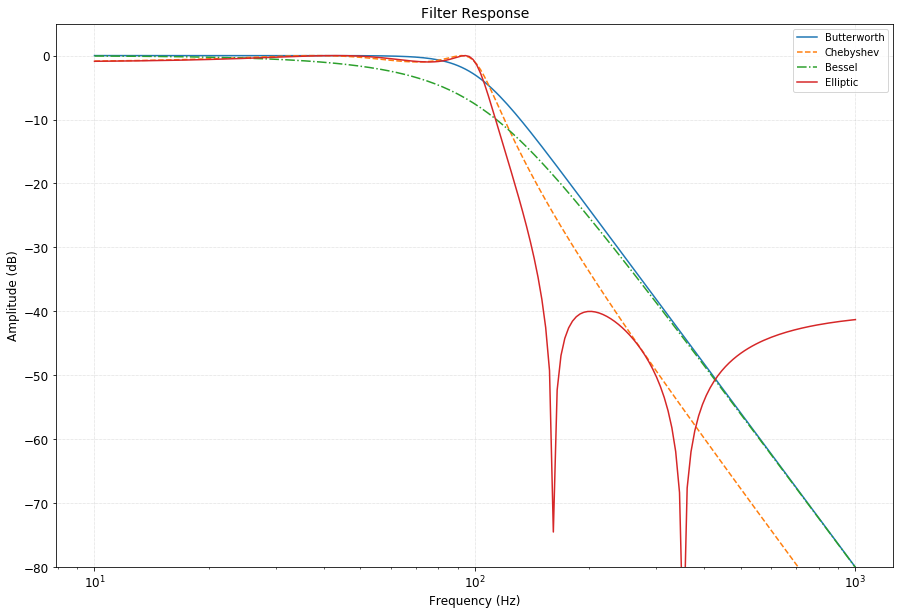

In [11]:
from matplotlib import pyplot as plt

from scipy import log10


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Create the line plot

plt.semilogx(w_butter, 20 * log10(abs(h_butter)), label='Butterworth')

plt.semilogx(w_cheby, 20 * log10(abs(h_cheby)), '--', label='Chebyshev')

plt.semilogx(w_bessel, 20 * log10(abs(h_bessel)), '-.', label='Bessel')

plt.semilogx(w_ellip, 20 * log10(abs(h_ellip)), '-', label='Elliptic')


# Set the y axis limit

plt.ylim(-80, 5)


# Set the x and y axis labels

plt.xlabel("Frequency (Hz)", size=12)

plt.ylabel("Amplitude (dB)", size=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title and labels

plt.title('Filter Response', size=14)


# Set the tick label size

plt.tick_params(labelsize=12)


# Show the legend

plt.legend(loc='upper right', prop={'size': 10})